## Problem Statement

The New York State's Charge NY EV Rebate Program faces a set of critical challenges that warrant attention and action to optimize its effectiveness and ensure alignment with its core objectives. At the heart of these challenges is the need to boost awareness and participation among potential electric vehicle (EV) buyers and dealerships, a task that demands the implementation of strategic initiatives. Moreover, the program possesses a valuable dataset, and effectively harnessing this data to gain insights into program performance, EV adoption trends, and environmental impact is a priority, requiring proficient data analysis.

Streamlining dealer enrollment and application processing procedures is essential to ensure the program's efficiency and facilitate smooth transactions for all stakeholders. Equally important is the adherence to the program's terms of service and license requirements to protect the data and maintain ethical data usage practices. To gauge its environmental impact, the program must establish reliable methodologies and metrics for assessing its contribution to emissions reduction and the promotion of renewable energy sources for EVs. Expanding outreach efforts to educate New Yorkers about the program's environmental benefits is vital, motivating them to invest in EVs with the aid of rebates and incentives.

Lastly, in light of the program's success, strategies for scaling the program to a broader audience or expanding it to additional regions must be developed, further promoting EV adoption and reducing environmental impacts on a larger scale. Addressing these challenges will be instrumental in enhancing the success and sustainability of the Charge NY EV Rebate Program and aligning it more effectively with New York State's environmental and energy objectives.

### Objective

The aim of this project is to utilize machine learning techniques in analyzing the effectiveness and impact of the Drive Clean Rebate program.

### Data Dictionary

* Data through Date	- The date up to which the data is available. (Date)
* Submitted Date - The date when the rebate application was submitted. (Date)
* Make - The manufacturer of the electric vehicle. (String)
* Model - The specific model of the electric vehicle. (String)
* County - The county where the electric vehicle was purchased or leased. (String)
* ZIP - The ZIP code of the dealership where the electric vehicle was purchased or leased. (String)
* EV - The category or type of electric vehicle. (String)
* Transaction Type -The nature of the transaction, whether it's a purchase or lease. (String)
* Annual GHG Emissions Reductions (MT CO2e)	- The estimated annual reduction in greenhouse gas emissions, measured in metric tons (MT CO2e). (Numeric)
* Annual Petroleum Reductions (gallons) -  The estimated annual reduction in petroleum usage, measured in gallons. (Numeric)
* Rebate Amount (USD) -	The monetary value of the rebate offered, expressed in US dollars. (Numeric)

## Importing required libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
vehicle_data = pd.read_csv('/content/drive/MyDrive/Electric_Vehicle/electric_vehicle_data.csv')

## Data Overview

### Displaying the first few rows of the dataset

In [6]:
vehicle_data.head()

,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
0,02/29/2020,01/13/2018,Ford,Focus,Westchester,10598,BEV,Lease,2.76,592.89,1700
1,02/29/2020,09/25/2017,Ford,Focus,Oneida,13601,BEV,Lease,2.76,592.89,1700
2,02/29/2020,04/26/2018,Ford,Focus,Suffolk,11776,BEV,Lease,2.76,592.89,1700
3,02/29/2020,08/30/2017,Ford,Focus,Nassau,11756,BEV,Lease,2.76,592.89,1700
4,02/29/2020,05/29/2018,Ford,Focus,Onondaga,13039,BEV,Purchase,2.76,592.89,1700


### Checking the shape of the dataset

In [7]:
# checking shape of the data
print(f"There are {vehicle_data.shape[0]} rows and {vehicle_data.shape[1]} columns.")

There are 23174 rows and 11 columns.


### Checking 10 random rows of the dataset

In [8]:
# let's view a sample of the data
vehicle_data.sample(n=10, random_state=1)

,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
6779,02/29/2020,02/07/2020,Tesla,Model 3,Westchester,10703,BEV,Purchase,3.31,592.89,2000
19125,02/29/2020,05/10/2018,Toyota,Prius Prime,Broome,13760,PHEV,Lease,3.03,440.11,1100
20506,02/29/2020,01/10/2020,Hyundai,Ionic Plug-In Hybrid,Niagara,14108,PHEV,Lease,2.89,451.54,1100
12662,02/29/2020,02/05/2019,Honda,Clarity,Monroe,14450,PHEV,Purchase,2.65,503.60,1700
8403,02/29/2020,11/26/2019,Tesla,Model 3,Westchester,10522,BEV,Purchase,2.99,592.89,2000
7338,02/29/2020,02/18/2020,Tesla,Model 3,Suffolk,11754,BEV,Purchase,3.31,592.89,2000
19366,02/29/2020,01/23/2020,Toyota,Prius Prime,Kings,11222,PHEV,Purchase,3.03,440.11,1100
14125,02/29/2020,05/25/2017,Toyota,Prius Prime,Monroe,14450,PHEV,Purchase,3.03,440.11,1100
1915,02/29/2020,10/18/2017,Chevrolet,Volt,Erie,14052,PHEV,Purchase,2.70,525.03,1700
22236,02/29/2020,01/11/2019,BMW,530e,Nassau,11709,PHEV,Lease,0.75,201.81,500


**Observations**

* `Date Columns`: The "Through Date" and "Submitted Date" columns seem to contain date information. It's essential to ensure that these columns are correctly formatted as date objects to enable time-based analysis. This might involve converting them to a consistent date format and checking for missing or erroneous values.

* `Make and Model Columns`: The "Make" and "Model" columns represent the vehicle's manufacturer and specific model. Data preprocessing should involve checking for consistency and standardizing the naming conventions. It may also be beneficial to extract additional information, such as the vehicle's category (e.g., sedan, SUV) from the "Model" column.

* `County and ZIP Columns`: The "County" and "ZIP" columns provide geographic information. Preprocessing should involve verifying the consistency of county names and checking for missing or erroneous ZIP codes. This information could be useful for geographical analysis.

* `EV Type and Transaction Type Columns`: The "EV Type" and "Transaction Type" columns indicate the type of electric vehicle and the transaction type, respectively. Ensure that the categories are consistent and properly labeled for analysis.

* `Annual GHG Emissions Reductions (MT CO2e) and Annual Petroleum Reductions (gallons)`: These columns appear to contain environmental impact data. Ensure that the numerical values are in a suitable format for analysis, and consider standardizing the units for consistency. For example, "MT CO2e" may need to be converted to metric tons, and "gallons" should be standardized.

* `Rebate Amount (USD)`: The "Rebate Amount" column represents the financial incentive in U.S. dollars. Ensure that the values are in numerical format and consider standardizing the formatting of the amounts, such as removing commas or special characters.

In [9]:
# let's create a copy of the data to avoid any changes to original data
df_vehicle = vehicle_data.copy()

### Checking the data types of the columns for the dataset

In [10]:
# checking column datatypes and number of non-null values
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23174 entries, 0 to 23173
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Data through Date                          23174 non-null  object 
 1   Submitted Date                             23174 non-null  object 
 2   Make                                       23174 non-null  object 
 3   Model                                      23174 non-null  object 
 4   County                                     23174 non-null  object 
 5   ZIP                                        23174 non-null  int64  
 6   EV Type                                    23174 non-null  object 
 7   Transaction Type                           23174 non-null  object 
 8   Annual GHG Emissions Reductions (MT CO2e)  23174 non-null  float64
 9   Annual Petroleum Reductions (gallons)      23174 non-null  float64
 10  Rebate Amount (USD)   

**Observations**

- `Data through Date`: This column contains dates representing the period for which the data is valid. It has 23,174 non-null entries and is of the "object" data type. It likely requires conversion to a datetime data type for time-based analysis.

* `Submitted Date`: This column represents the date when the data was submitted or recorded. It also has 23,174 non-null entries and is of the "object" data type. Similar to the "Data through Date" column, it may need conversion to a datetime data type.

* `Make`: This column contains the manufacturer or brand of the electric vehicles. It has 23,174 non-null entries and is of the "object" data type. It appears to be categorical data.

* `Model`: The "Model" column represents the specific model or series of the electric vehicles. Like "Make," it has 23,174 non-null entries and is of the "object" data type. It's also categorical data.

* `County`: This column indicates the county or geographic location associated with the data. It has 23,174 non-null entries and is of the "object" data type. It's categorical geographical data.

ZIP: The "ZIP" column contains numeric ZIP code values, and it is of the "int64" data type. It has 23,174 non-null entries and is likely used for geographical analysis.

* `EV Type`: This column specifies the type of electric vehicle, such as "BEV" (Battery Electric Vehicle) or "PHEV" (Plug-in Hybrid Electric Vehicle). It has 23,174 non-null entries and is of the "object" data type. It's a categorical variable.

* `Transaction Type`: The "Transaction Type" column indicates the type of transaction related to the electric vehicles, such as "Purchase" or "Lease." It has 23,174 non-null entries and is of the "object" data type. It's also categorical data.

* `Annual GHG Emissions Reductions (MT CO2e)`: This column contains numeric values representing annual greenhouse gas emissions reductions in metric tons of CO2 equivalent. It has 23,174 non-null entries and is of the "float64" data type.

* `Annual Petroleum Reductions (gallons)`: The "Annual Petroleum Reductions" column contains numeric values representing annual reductions in petroleum usage in gallons. It has 23,174 non-null entries and is of the "float64" data type.

* `Rebate Amount (USD)`: This column contains numeric values representing the rebate amount in U.S. dollars associated with the electric vehicles. It has 23,174 non-null entries and is of the "int64" data type.

### Checking missing values

In [11]:
df_vehicle.isnull().sum()

Data through Date                            0
Submitted Date                               0
Make                                         0
Model                                        0
County                                       0
ZIP                                          0
EV Type                                      0
Transaction Type                             0
Annual GHG Emissions Reductions (MT CO2e)    0
Annual Petroleum Reductions (gallons)        0
Rebate Amount (USD)                          0
dtype: int64

**Observations**

* There are no missing values in the dataset.

### Let's check the statistical summary of the numerical variables.

In [12]:
df_vehicle.describe().T

,count,mean,std,min,25%,50%,75%,max
ZIP,23174.0,12206.410935,1314.792418,10001.00,11369.25,11788.00,13041.00,14905.00
Annual GHG Emissions Reductions (MT CO2e),23174.0,2.692061,0.641441,-0.93,2.65,2.99,3.03,3.31
Annual Petroleum Reductions (gallons),23174.0,488.940697,108.241707,-7.11,440.11,503.60,592.89,592.89
Rebate Amount (USD),23174.0,1408.893588,494.254611,500.00,1100.00,1100.00,2000.00,2000.00


**Observations**

* `ZIP`: The "ZIP" variable contains 23,174 non-null entries, representing ZIP codes associated with the data. The mean ZIP code is approximately 12,206.41, with a standard deviation of roughly 1,314.79. The range of ZIP codes spans from a minimum of 10,001 to a maximum of 14,905. The distribution appears to be relatively wide, with a median ZIP code of 11,788, indicating some variation in the data. The ZIP code can be used for geographical analysis, but the standard deviation suggests there is a notable spread among the data points.

* `Annual GHG Emissions Reductions (MT CO2e)`:
This variable also consists of 23,174 non-null entries and represents the annual greenhouse gas (GHG) emissions reductions in metric tons of CO2 equivalent (MT CO2e). The mean reduction is approximately 2.69 MT CO2e, with a standard deviation of about 0.64 MT CO2e. The minimum reduction is -0.93 MT CO2e, which might be an outlier, and the maximum reduction is 3.31 MT CO2e. The data has a relatively narrow distribution with a median reduction of 2.99 MT CO2e, indicating that most observations fall within a reasonably consistent range.

* `Annual Petroleum Reductions (gallons)`:
With 23,174 non-null entries, the "Annual Petroleum Reductions" variable represents annual reductions in petroleum usage in gallons. The mean reduction is approximately 488.94 gallons, with a standard deviation of roughly 108.24 gallons. Interestingly, the data includes a minimum reduction of -7.11 gallons, which might be an outlier. The maximum reduction is 592.89 gallons, but this value appears to be common across the dataset. The data distribution is moderately spread out, with a median reduction of 503.60 gallons, suggesting variation in petroleum reductions among the observations.

* `Rebate Amount (USD)`:
The "Rebate Amount" variable, which contains 23,174 non-null entries, represents the financial incentives associated with the electric vehicles in U.S. dollars. The mean rebate amount is approximately 1,408.89 USD, with a standard deviation of approximately 494.25 USD. The minimum rebate amount is 500.00 USD, while the maximum rebate amount is 2,000.00 USD. It's worth noting that the 25th and 50th percentiles are both 1,100.00 USD, indicating that this amount is common in the dataset. The data distribution is moderately dispersed, with potential outliers or variations in rebate amounts among the observations.

In [13]:
num_to_dis = 10

for colname in df_vehicle.dtypes[df_vehicle.dtypes == "object"].index:
    value_count = df_vehicle[colname].value_counts(dropna=False)
    print(value_count[:num_to_dis])

    if len(value_count) > num_to_dis:
        print(f"Only displaying first {num_to_dis} of {len(value_count)} values.")
    print("-" * 50, "\n")

02/29/2020    23174
Name: Data through Date, dtype: int64
-------------------------------------------------- 

08/08/2019    254
02/07/2020    214
08/09/2019    209
02/19/2020    170
08/14/2019    155
01/23/2019    137
02/12/2020    130
02/06/2020    125
02/11/2020    117
02/10/2020    114
Name: Submitted Date, dtype: int64
Only displaying first 10 of 993 values.
-------------------------------------------------- 

Toyota        5804
Tesla         5128
Chevrolet     3105
Honda         2087
Ford          1869
Hyundai       1115
BMW           1101
Kia           1016
Nissan         759
Mitsubishi     506
Name: Make, dtype: int64
Only displaying first 10 of 20 values.
-------------------------------------------------- 

Prius Prime             5804
Model 3                 3823
Clarity                 2087
Volt                    1645
Fusion Energi           1594
Bolt                    1460
LEAF                     759
Model X                  694
Model S                  611
Ionic Plug-In

**Observations**

* `Make`:

  * The "Make" variable contains data on the manufacturers or brands of electric vehicles.
  * The most common make is "Toyota" with 5,804 occurrences, followed closely by "Tesla" with 5,128 occurrences.
Other prominent makes include "Chevrolet" (3,105), "Honda" (2,087), "Ford" (1,869), "Hyundai" (1,115), "BMW" (1,101), "Kia" (1,016), "Nissan" (759), and "Mitsubishi" (506).

* `Model`:

  * The "Model" variable represents the specific model or series of electric vehicles.
  * "Prius Prime" is the most frequent model, occurring 5,804 times.
  * "Model 3" is the second most common model with 3,823 occurrences.
  * Other notable models include "Clarity" (2,087), "Volt" (1,645), "Fusion Energi" (1,594), "Bolt" (1,460), "LEAF" (759), "Model X" (694), "Model S" (611), and "Ionic Plug-In Hybrid" (593).

* `County`:

  * The "County" variable provides information about the counties or geographic locations associated with the data.
  * "Suffolk" is the most frequently mentioned county, with 4,628 occurrences.
  * "Nassau" is the second most common county with 3,029 mentions.
Other frequently mentioned counties include "Westchester" (2,001), "Monroe" (1,694), "Erie" (1,183), "Queens" (898), "Onondaga" (713), "Kings" (699), "Albany" (686), and "New York" (613).

* `EV Type`:

  * The "EV Type" variable categorizes electric vehicles into two types: "PHEV" (Plug-in Hybrid Electric Vehicle) and "BEV" (Battery Electric Vehicle).
  * "PHEV" is the more common category, occurring 14,436 times.
  * "BEV" is the second category with 8,738 mentions.

* `Transaction Type`:

  * The "Transaction Type" variable describes the type of transactions related to electric vehicles, such as "Purchase" or "Lease."
  * "Purchase" is the more frequent transaction type, appearing 13,359 times.
  * "Lease" is the second most common transaction type with 9,815 occurrences.

In [15]:
# checking Rebate Amount grouped by brand
df_vehicle.groupby(["Model"])["Rebate Amount (USD)"].mean().sort_values(ascending=False)

Model
Kona Electric                2000.000000
Bolt                         2000.000000
Ionic_Electric               2000.000000
e-Golf                       1991.000000
Model 3                      1963.117970
LEAF                         1928.063241
i3                           1778.947368
i3 REx                       1778.801843
B250e                        1700.000000
Electric Fortwo Cabriolet    1700.000000
Electric Fortwo Coupe        1700.000000
Focus                        1700.000000
Soul EV                      1700.000000
Clarity                      1700.000000
Volt                         1695.623100
Niro                         1319.685039
Outlander                    1100.000000
Optima Plug-in               1100.000000
Sonata Plug-in               1100.000000
Pacifica                     1100.000000
Ionic Plug-In Hybrid         1100.000000
Prius Prime                  1100.000000
Fusion Energi                1099.247177
C-MAX Energi                 1092.800000
Taycan    

**Observations**

* `Top Models with Highest Mean Rebate Amount`:

  * "Kona Electric," "Bolt," and "Ionic_Electric" have the highest mean rebate amounts, all at 2,000 dollars. These models seem to have the most substantial rebates, indicating strong incentives for buyers.
"e-Golf" also offers a relatively high mean rebate of $1,991.

* `Variability in Mean Rebates`:

  * The mean rebate amounts for various models exhibit significant variability. While some models have high rebates, others, such as "i8" and "740e," have mean rebate amounts of $500.

* `Prominence of Tesla Model 3`:

  * "Model 3" by Tesla, despite not having the highest mean rebate, is a widely-adopted model with a mean rebate amount of 1,963.12 dollars.

* `Common Mean Rebate of $1,100`:

  * Several models, including "Volt," "Niro," "Outlander," "Optima Plug-in," "Sonata Plug-in," "Pacifica," and "Ionic Plug-In Hybrid," share a common mean rebate amount of $1,100.

* `Mix of Electric and Plug-In Hybrid Models`:

  * The models listed represent a mix of fully electric (BEV) and plug-in hybrid (PHEV) vehicles. While some BEV models like "Model 3" have relatively high rebates, PHEV models like "Volt" and "Niro" also have competitive rebate amounts.

## Exploratory Data Analysis (EDA)

In [17]:
def create_labeled_barplot(data, feature, display_percentage=False, top_n=None):

    data_length = len(data[feature])
    unique_values_count = data[feature].nunique()

    if top_n is None:
        plt.figure(figsize=(unique_values_count + 1, 5))
    else:
        plt.figure(figsize=(top_n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:top_n].sort_values(),
    )

    for p in ax.patches:
        if display_percentage:
            percentage_label = "{:.1f}%".format(100 * p.get_height() / data_length)
            label = percentage_label
        else:
            count_label = p.get_height()
            label = count_label

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

In [19]:
def plot_histogram_box(data_df, column, figsize=(12, 7), enable_kde=False, custom_bins=None):

    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data_df, x=column, ax=ax_box, showmeans=True, color="violet"
    )
    if custom_bins:
        sns.histplot(
            data=data_df, x=column, kde=enable_kde, ax=ax_hist, bins=custom_bins, palette="winter"
        )
    else:
        sns.histplot(
            data=data_df, x=column, kde=enable_kde, ax=ax_hist, palette="winter"
        )
    ax_hist.axvline(
        data_df[column].mean(), color="green", linestyle="--"
    )
    ax_hist.axvline(
        data_df[column].median(), color="black", linestyle="-"
    )

### Univariate Analysis

#### `Annual GHG Emissions Reductions`

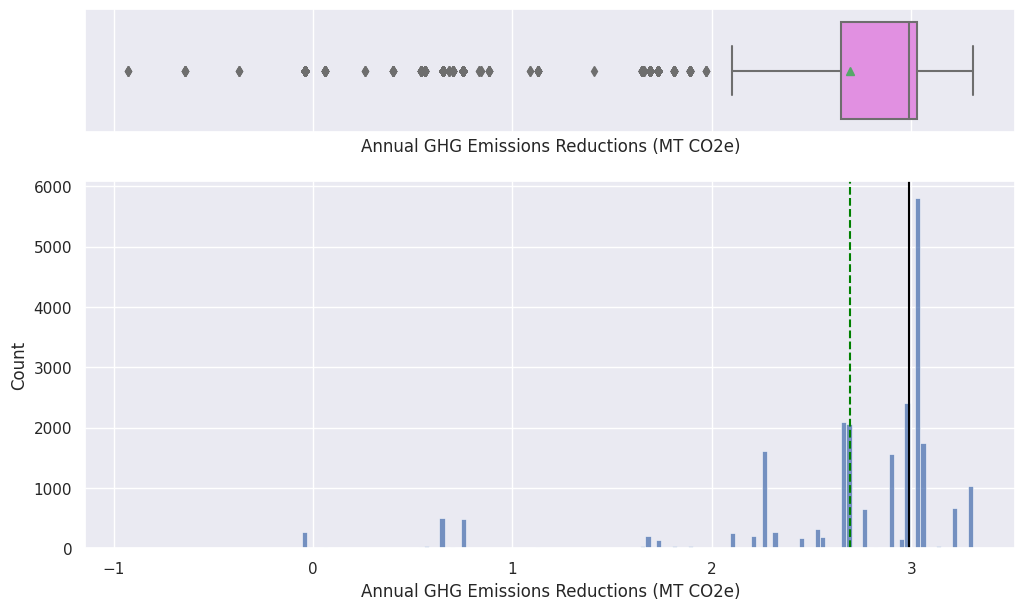

In [24]:
plot_histogram_box(df_vehicle, "Annual GHG Emissions Reductions (MT CO2e)", enable_kde=False, custom_bins=None)

**Observations**

* From the above boxplot, we can observe the presence of outliers in this variable, which we can address during the data preprocessing stage.

#### `Annual Petroleum Reductions`

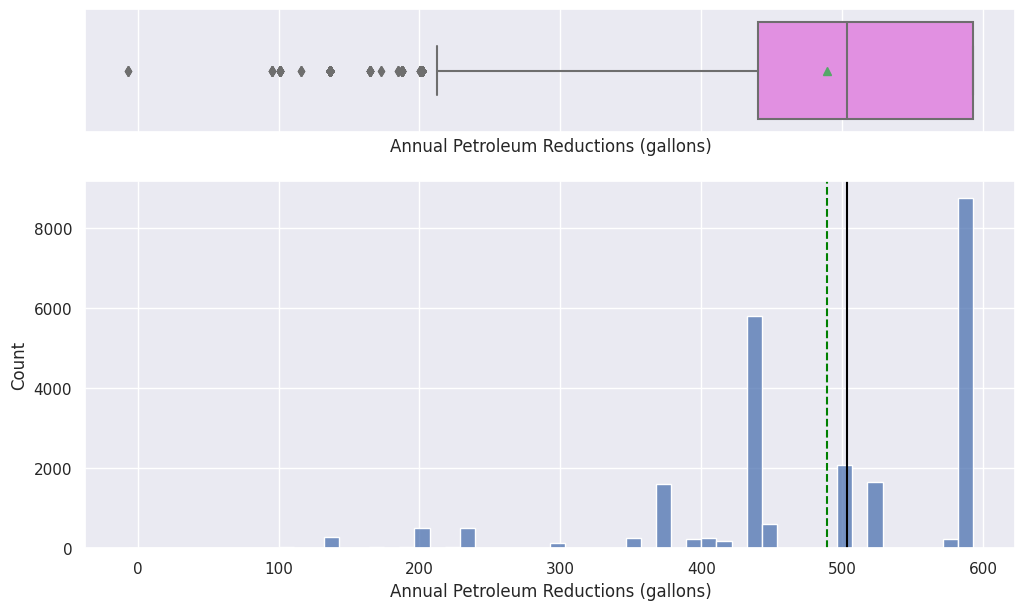

In [25]:
plot_histogram_box(df_vehicle, "Annual Petroleum Reductions (gallons)", enable_kde=False, custom_bins=None)

**Observations**

* From the above plot, we can observe the presence of a few outliers, and the distribution is right-skewed.

#### `Rebate Amount`

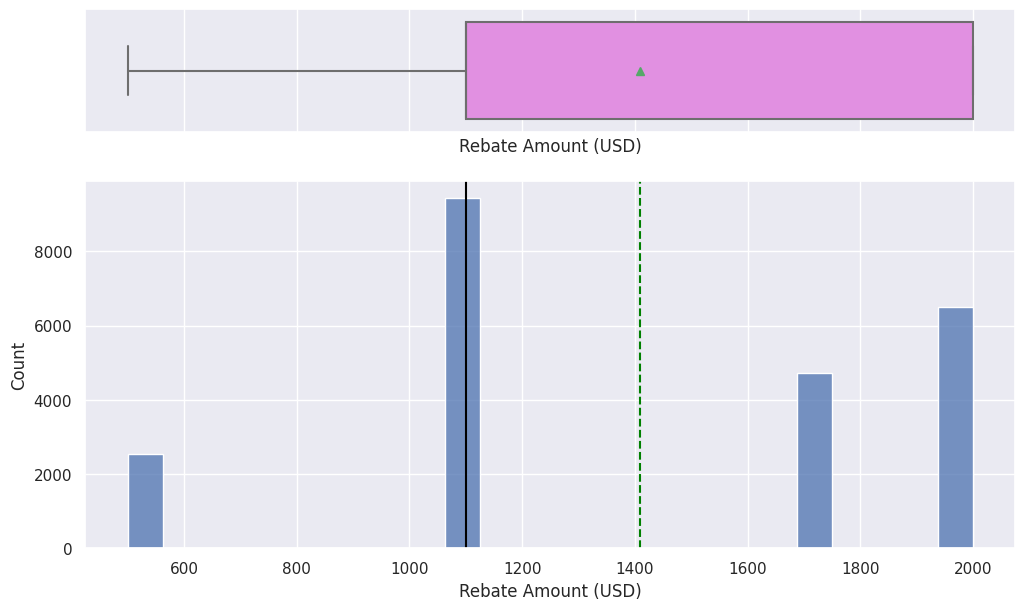

In [26]:
plot_histogram_box(df_vehicle, "Rebate Amount (USD)", enable_kde=False, custom_bins=None)

**Observations**

* From the above plot, we observe that there are no outliers, and the values in this variable are 500, 1100, 1700, and 2000.

#### `Make`

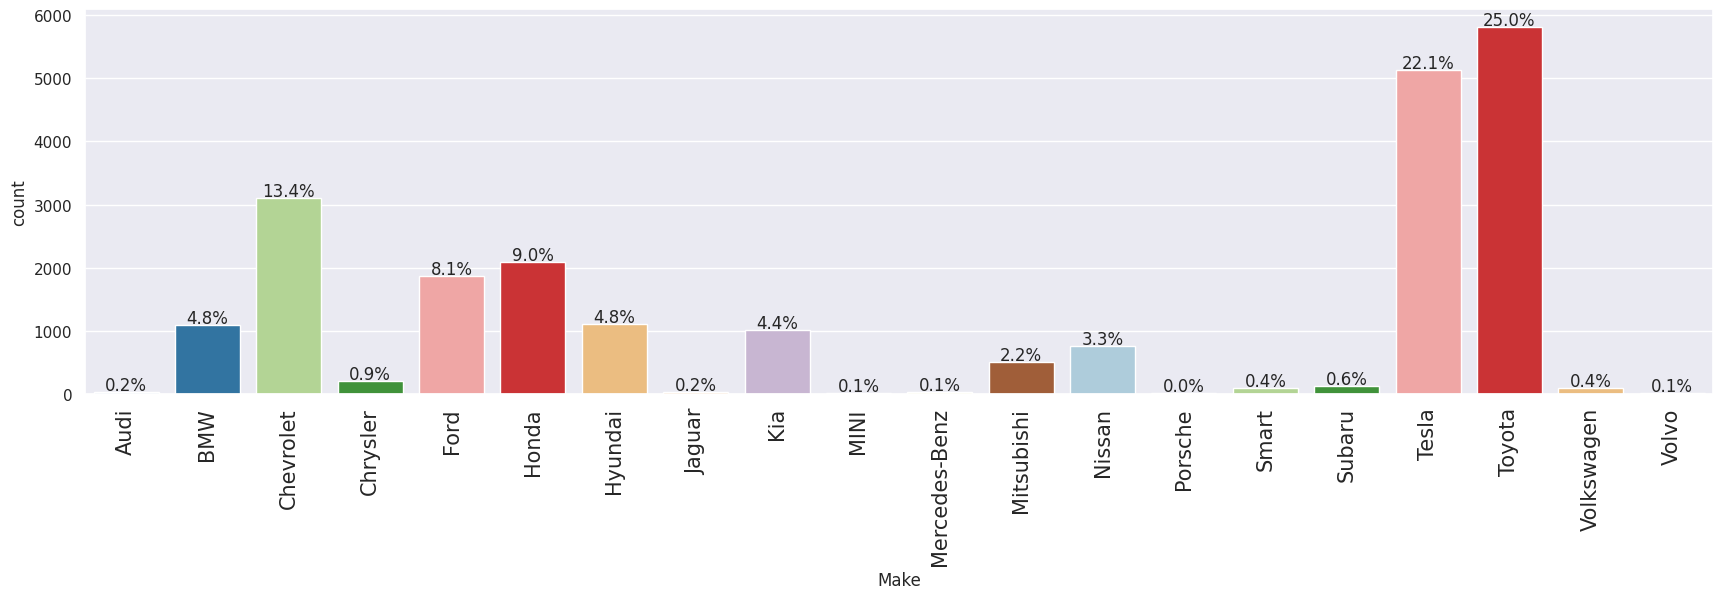

In [27]:
create_labeled_barplot(df_vehicle, "Make", display_percentage=True)

**Observations**

* The most common make is "Toyota" 25%, followed closely by "Tesla" with 22.1%.
* Lowest make is MINI (0.1%), Mercedes-Benz (0.1%) and Audi (0.2%).

#### `Model`

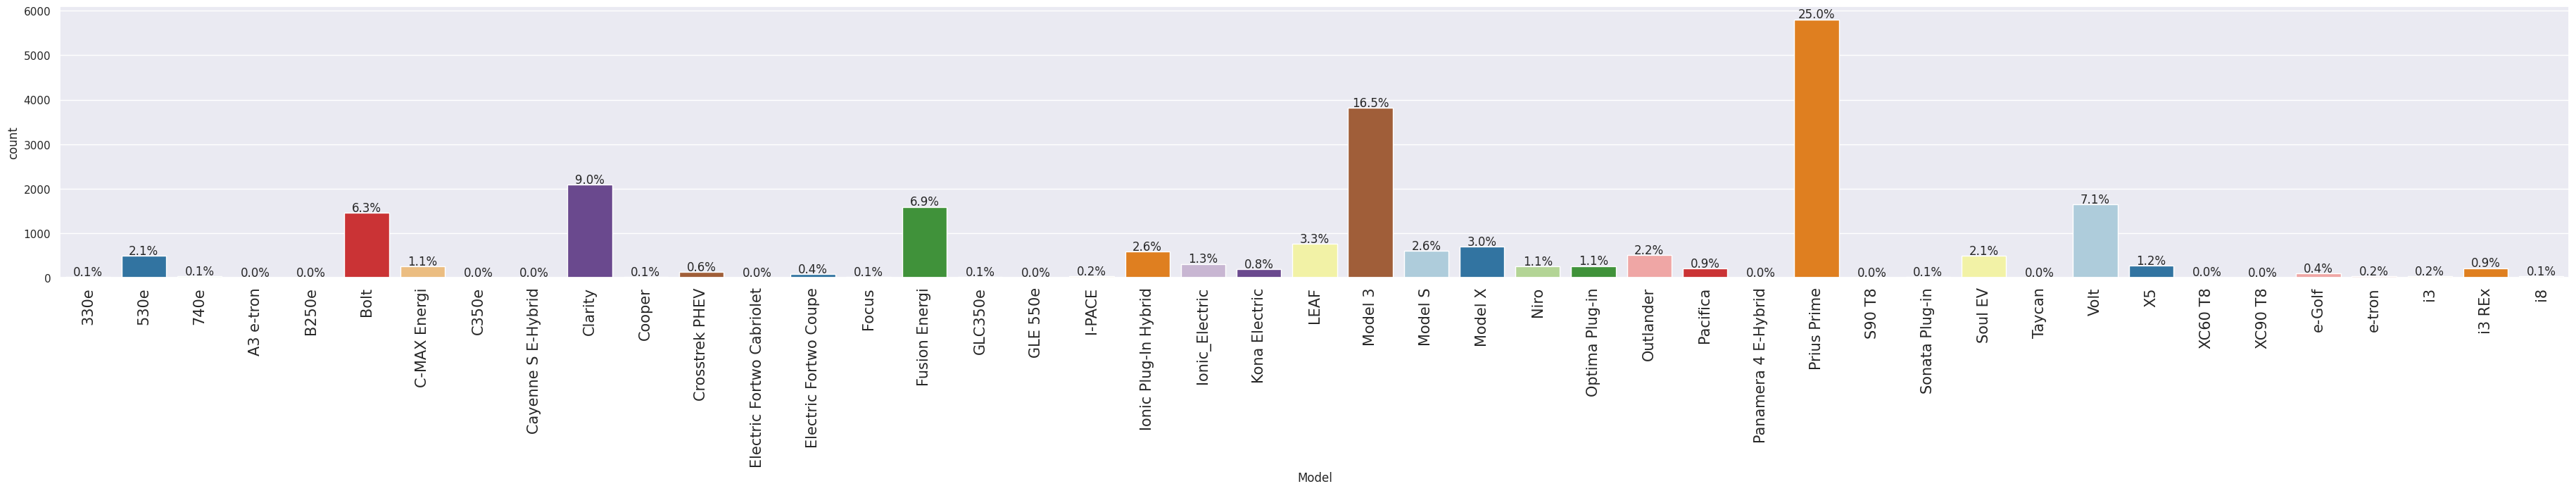

In [28]:
create_labeled_barplot(df_vehicle, "Model", display_percentage=True)

**Observations**

* Prius Prime and Model 3 are the most purchased models, contributing 25% and 16.5%, respectively.

* A3 e-tron and B250e are some of the lowest %.

#### `Country`

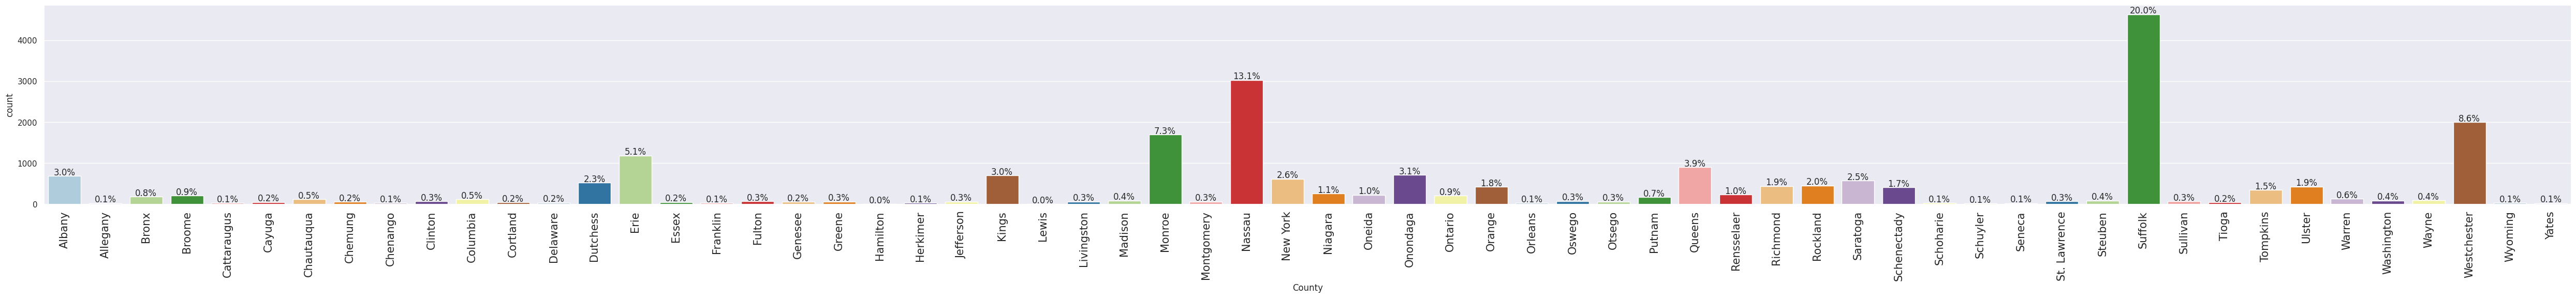

In [29]:
create_labeled_barplot(df_vehicle, "County", display_percentage=True)

**Observations**

* Most of the customers are purchasing cars from Suffolk (20%), followed by Nassau (13.1%).

#### `EV Type`

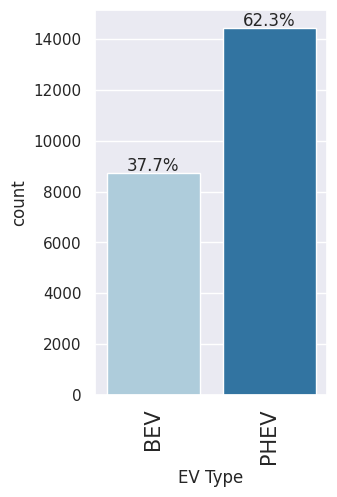

In [30]:
create_labeled_barplot(df_vehicle, "EV Type", display_percentage=True)

**Observations**

* PHEV is the more common category of EV cars, with 62.3% being purchased.

#### `Transaction Type`

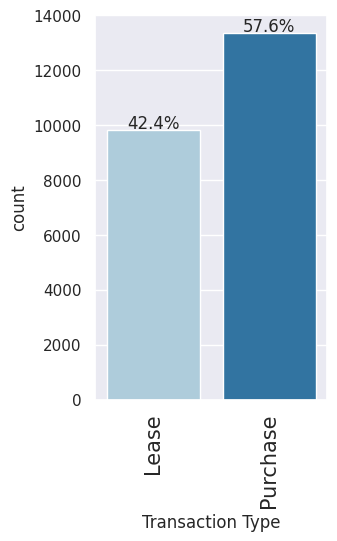

In [31]:
create_labeled_barplot(df_vehicle, "Transaction Type", display_percentage=True)

**Observations**

* "Purchase" is the more frequent transaction type having 57.6%.

### Bivariate Analysis

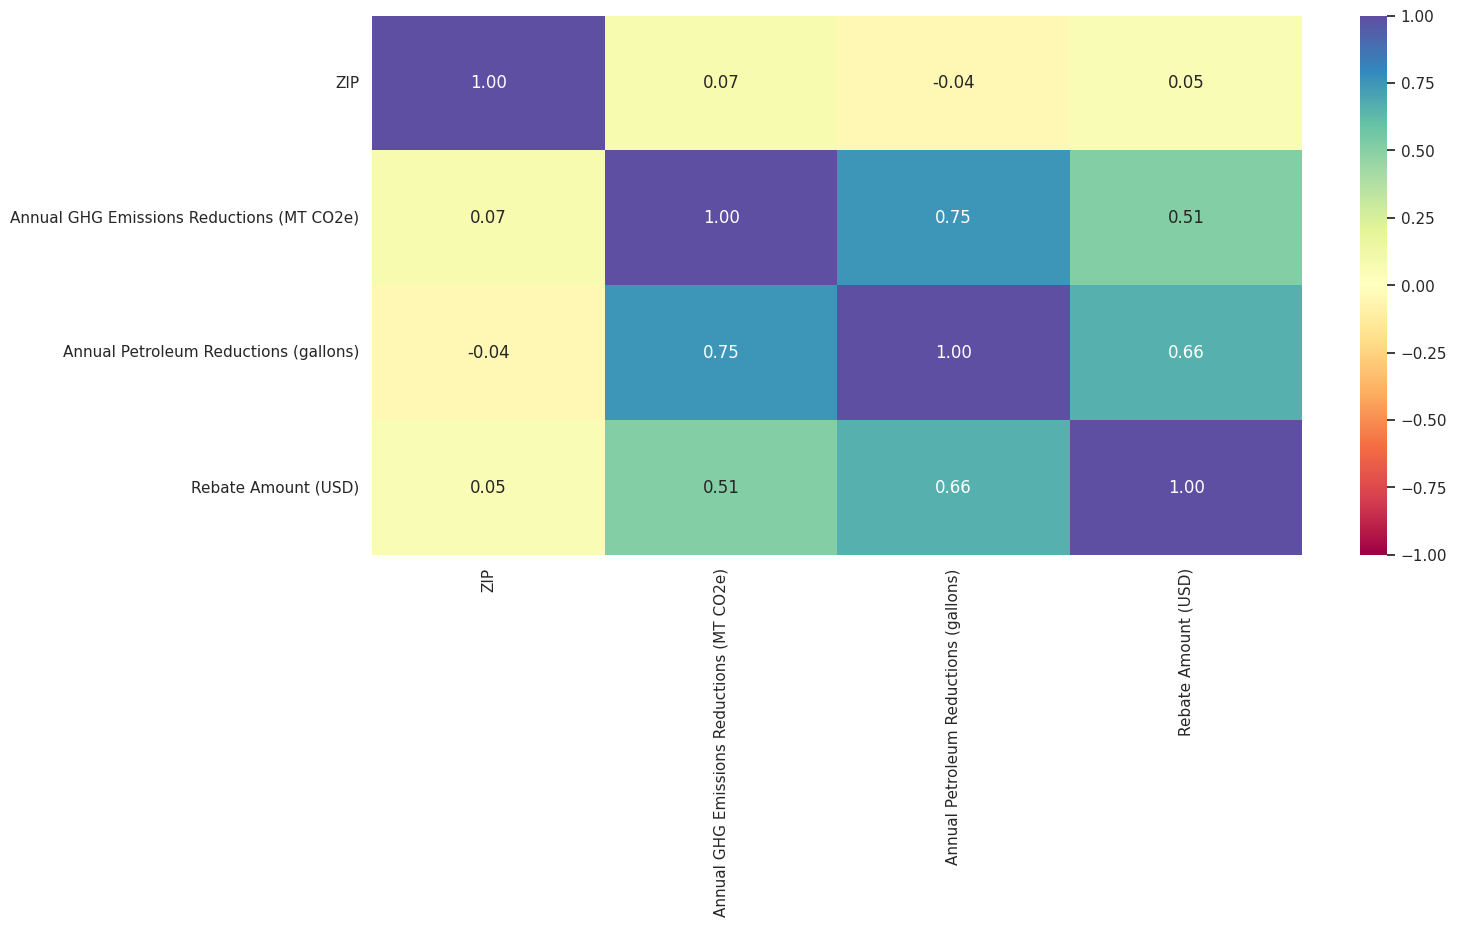

In [33]:
numeric_columns = df_vehicle.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
correlation_matrix = df_vehicle[numeric_columns].corr()
sns.heatmap(
    correlation_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**

* ZIP (ZIP code) and Annual GHG Emissions Reductions have a very low positive correlation of approximately 0.0737. This suggests that there is a weak positive relationship between ZIP codes and the reduction of greenhouse gas emissions. In other words, there is some geographic variability in emissions reductions, but it's not very strongly correlated with ZIP codes.
Annual GHG Emissions Reductions and Annual Petroleum Reductions:

* Annual GHG Emissions Reductions and Annual Petroleum Reductions have a relatively strong positive correlation of about 0.7525. This indicates a strong positive relationship between reducing greenhouse gas emissions and reducing petroleum consumption. It's expected that as one increases, the other also tends to increase.
Annual GHG Emissions Reductions and Rebate Amount:

* Annual GHG Emissions Reductions and Rebate Amount have a moderate positive correlation of approximately 0.5099. This suggests that there is a moderate positive relationship between the reduction of greenhouse gas emissions and the rebate amount. As emissions reductions increase, the rebate amount tends to increase, indicating that incentives may be offered for cleaner, more environmentally friendly vehicles.
Annual Petroleum Reductions and Rebate Amount:

* Annual Petroleum Reductions and Rebate Amount also have a moderate positive correlation, around 0.6582. This indicates a moderate positive relationship between reducing petroleum consumption and the rebate amount. Vehicles that reduce petroleum usage tend to have higher rebate amounts, likely as an incentive to promote such vehicles.

Overall, the correlation plot helps in understanding the relationships between these variables. Notably, reducing petroleum consumption and reducing greenhouse gas emissions appear to be positively correlated with each other and with the rebate amount, which suggests that incentives are aligned with these environmental goals. However, ZIP codes show only a weak relationship with emissions reductions. Hence we can drop ZIP code from the data.

## Data Preprocessing

**What is Data Pre-Processing?**

Data preprocessing is a crucial step in the data analysis pipeline that involves cleaning, transforming, and organizing raw data into a format suitable for analysis. It aims to improve the quality and utility of the data by addressing issues, enhancing its readiness for modeling, and ensuring that it aligns with the specific requirements of the analysis or machine learning tasks. Here are some key points regarding data preprocessing:

* `Data Cleaning`:

  * Removing or handling missing values to prevent data inconsistencies.
  * Addressing duplicate records to avoid redundancy and bias.
  * Handling outliers that can skew results or affect model performance.

* `Data Transformation`:

  * Scaling or normalizing features to bring them to a common scale, facilitating comparison.
  * Encoding categorical variables into numerical values to make them suitable for mathematical models.
  * Feature engineering to create new features or derive meaningful insights from existing ones.

* `Data Reduction`:

  * Dropping irrelevant and highly correlated variables from the dataset.

* `Splitting Data`:

  * Separating the dataset into training, and testing sets for model development and evaluation.

**Combination Features**

* Create new features that represent combinations of existing ones. For example, you can combine "Make" and "Model" to create a "Vehicle Name" feature.

* Calculate the ratio of "Annual GHG Emissions Reductions (MT CO2e)" to "Annual Petroleum Reductions (gallons)" to determine the efficiency of each vehicle in terms of emissions reduction per gallon saved.

**Reason**
Creating new features by combining existing ones, such as "Make" and "Model" allows the model to capture interactions between these variables.

For example, some vehicle makes and models may be associated with higher or lower rebate amounts, and this interaction feature can help the model discern these relationships.

"Emissions_Reduction_Per_Gallon" provides a new measure of efficiency by dividing emissions reductions by petroleum reductions.

In [56]:
df_vehicle['Vehicle_Name'] = df_vehicle['Make'] + ' ' + df_vehicle['Model']

In [57]:
df_vehicle.head()

,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD),Vehicle_Name
0,02/29/2020,01/13/2018,Ford,Focus,Westchester,10598,BEV,Lease,2.76,592.89,1700,Ford Focus
1,02/29/2020,09/25/2017,Ford,Focus,Oneida,13601,BEV,Lease,2.76,592.89,1700,Ford Focus
2,02/29/2020,04/26/2018,Ford,Focus,Suffolk,11776,BEV,Lease,2.76,592.89,1700,Ford Focus
3,02/29/2020,08/30/2017,Ford,Focus,Nassau,11756,BEV,Lease,2.76,592.89,1700,Ford Focus
4,02/29/2020,05/29/2018,Ford,Focus,Onondaga,13039,BEV,Purchase,2.76,592.89,1700,Ford Focus


In [61]:
df_vehicle['Emissions_Reduction_Per_Gallon'] = df_vehicle['Annual GHG Emissions Reductions (MT CO2e)'] / df_vehicle['Annual Petroleum Reductions (gallons)']

**Categorical Features**:

One-hot encode categorical features like "Vehicle_Name", "EV Type," and "Transaction Type" to convert them into numerical format for machine learning models.

**Reason**

Categorical features like "Vehicle_Name", "EV Type," and "Transaction Type" need to be converted into numerical format for machine learning algorithms to work with them. One-hot encoding transforms categorical variables into binary (0 or 1) columns, making it easier for the model to understand and learn from these categories.

In [60]:
df_vehicle = pd.get_dummies(df_vehicle, columns=['Vehicle_Name', 'EV Type', 'Transaction Type'], prefix=['Vehicle_Name', 'EV', 'Transaction'])

In [62]:
df_vehicle.head()

,Data through Date,Submitted Date,Make,Model,County,ZIP,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD),Vehicle_Name_Audi A3 e-tron,Vehicle_Name_Audi e-tron,Vehicle_Name_BMW 330e,Vehicle_Name_BMW 530e,Vehicle_Name_BMW 740e,Vehicle_Name_BMW X5,Vehicle_Name_BMW i3,Vehicle_Name_BMW i3 REx,Vehicle_Name_BMW i8,Vehicle_Name_Chevrolet Bolt,Vehicle_Name_Chevrolet Volt,Vehicle_Name_Chrysler Pacifica,Vehicle_Name_Ford C-MAX Energi,Vehicle_Name_Ford Focus,Vehicle_Name_Ford Fusion Energi,Vehicle_Name_Honda Clarity,Vehicle_Name_Hyundai Ionic Plug-In Hybrid,Vehicle_Name_Hyundai Ionic_Electric,Vehicle_Name_Hyundai Kona Electric,Vehicle_Name_Hyundai Sonata Plug-in,Vehicle_Name_Jaguar I-PACE,Vehicle_Name_Kia Niro,Vehicle_Name_Kia Optima Plug-in,Vehicle_Name_Kia Soul EV,Vehicle_Name_MINI Cooper,Vehicle_Name_Mercedes-Benz B250e,Vehicle_Name_Mercedes-Benz C350e,Vehicle_Name_Mercedes-Benz GLC350e,Vehicle_Name_Mercedes-Benz GLE 550e,Vehicle_Name_Mitsubishi Outlander,Vehicle_Name_Nissan LEAF,Vehicle_Name_Porsche Cayenne S E-Hybrid,Vehicle_Name_Porsche Panamera 4 E-Hybrid,Vehicle_Name_Porsche Taycan,Vehicle_Name_Smart Electric Fortwo Cabriolet,Vehicle_Name_Smart Electric Fortwo Coupe,Vehicle_Name_Subaru Crosstrek PHEV,Vehicle_Name_Tesla Model 3,Vehicle_Name_Tesla Model S,Vehicle_Name_Tesla Model X,Vehicle_Name_Toyota Prius Prime,Vehicle_Name_Volkswagen e-Golf,Vehicle_Name_Volvo S90 T8,Vehicle_Name_Volvo XC60 T8,Vehicle_Name_Volvo XC90 T8,EV_BEV,EV_PHEV,Transaction_Lease,Transaction_Purchase,Emissions_Reduction_Per_Gallon
0,02/29/2020,01/13/2018,Ford,Focus,Westchester,10598,2.76,592.89,1700,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.004655
1,02/29/2020,09/25/2017,Ford,Focus,Oneida,13601,2.76,592.89,1700,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.004655
2,02/29/2020,04/26/2018,Ford,Focus,Suffolk,11776,2.76,592.89,1700,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.004655
3,02/29/2020,08/30/2017,Ford,Focus,Nassau,11756,2.76,592.89,1700,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.004655
4,02/29/2020,05/29/2018,Ford,Focus,Onondaga,13039,2.76,592.89,1700,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.004655


In [65]:
# Let's drop few of the variables, which are not required for model building
df_vehicle.drop(['Data through Date','Submitted Date','Make','Model','County','ZIP','Annual GHG Emissions Reductions (MT CO2e)','Annual Petroleum Reductions (gallons)'],axis=1,inplace=True)

In [66]:
df_vehicle.head()

,Rebate Amount (USD),Vehicle_Name_Audi A3 e-tron,Vehicle_Name_Audi e-tron,Vehicle_Name_BMW 330e,Vehicle_Name_BMW 530e,Vehicle_Name_BMW 740e,Vehicle_Name_BMW X5,Vehicle_Name_BMW i3,Vehicle_Name_BMW i3 REx,Vehicle_Name_BMW i8,Vehicle_Name_Chevrolet Bolt,Vehicle_Name_Chevrolet Volt,Vehicle_Name_Chrysler Pacifica,Vehicle_Name_Ford C-MAX Energi,Vehicle_Name_Ford Focus,Vehicle_Name_Ford Fusion Energi,Vehicle_Name_Honda Clarity,Vehicle_Name_Hyundai Ionic Plug-In Hybrid,Vehicle_Name_Hyundai Ionic_Electric,Vehicle_Name_Hyundai Kona Electric,Vehicle_Name_Hyundai Sonata Plug-in,Vehicle_Name_Jaguar I-PACE,Vehicle_Name_Kia Niro,Vehicle_Name_Kia Optima Plug-in,Vehicle_Name_Kia Soul EV,Vehicle_Name_MINI Cooper,Vehicle_Name_Mercedes-Benz B250e,Vehicle_Name_Mercedes-Benz C350e,Vehicle_Name_Mercedes-Benz GLC350e,Vehicle_Name_Mercedes-Benz GLE 550e,Vehicle_Name_Mitsubishi Outlander,Vehicle_Name_Nissan LEAF,Vehicle_Name_Porsche Cayenne S E-Hybrid,Vehicle_Name_Porsche Panamera 4 E-Hybrid,Vehicle_Name_Porsche Taycan,Vehicle_Name_Smart Electric Fortwo Cabriolet,Vehicle_Name_Smart Electric Fortwo Coupe,Vehicle_Name_Subaru Crosstrek PHEV,Vehicle_Name_Tesla Model 3,Vehicle_Name_Tesla Model S,Vehicle_Name_Tesla Model X,Vehicle_Name_Toyota Prius Prime,Vehicle_Name_Volkswagen e-Golf,Vehicle_Name_Volvo S90 T8,Vehicle_Name_Volvo XC60 T8,Vehicle_Name_Volvo XC90 T8,EV_BEV,EV_PHEV,Transaction_Lease,Transaction_Purchase,Emissions_Reduction_Per_Gallon
0,1700,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.004655
1,1700,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.004655
2,1700,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.004655
3,1700,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.004655
4,1700,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.004655


### Data Preparation for modeling with Rebate Amount as Dependent variable

In [68]:
# defining the dependent and independent variables
X = df_vehicle.drop(["Rebate Amount (USD)"], axis=1)
y = df_vehicle["Rebate Amount (USD)"]

In [69]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [70]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 16221
Number of rows in test data = 6953


## Model Building

### Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [35]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def adjusted_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n_samples = predictors.shape[0]
    n_features = predictors.shape[1]
    return 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))

def mean_absolute_percentage_error(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

def regression_model_performance(model, predictors, target):

    # Predicting using the independent variables
    predicted_values = model.predict(predictors)

    r_squared = r2_score(target, predicted_values)  # Compute R-squared
    adjusted_r_squared = adjusted_r2_score(predictors, target, predicted_values)  # Compute adjusted R-squared
    root_mean_squared_error = np.sqrt(mean_squared_error(target, predicted_values))  # Compute RMSE
    mean_absolute_error_value = mean_absolute_error(target, predicted_values)  # Compute MAE
    mean_absolute_percentage_err = mean_absolute_percentage_error(target, predicted_values)  # Compute MAPE

    # Create a DataFrame of metrics
    performance_metrics = pd.DataFrame(
        {
            "RMSE": root_mean_squared_error,
            "MAE": mean_absolute_error_value,
            "R-squared": r_squared,
            "Adj. R-squared": adjusted_r_squared,
            "MAPE": mean_absolute_percentage_err,
        },
        index=[0],
    )

    return performance_metrics

### Linear Regression

In [71]:
# fitting a linear model
lin_reg_model1 = LinearRegression()
lin_reg_model1.fit(x_train, y_train)

LinearRegression()

In [72]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model1_perf_train = regression_model_performance(
    lin_reg_model1, x_train, y_train
)
lin_reg_model1_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,98.420365,19.588073,0.960464,0.960342,2.010115


**Observations**:

* RMSE (Root Mean Squared Error): The RMSE for the training data is approximately 98.42. It measures the average prediction error of the model, with lower values indicating better performance. In this case, the model's predictions on the training data have an average error of approximately 98.42 units.

* MAE (Mean Absolute Error): The MAE for the training data is approximately 19.59. MAE measures the average absolute difference between the model's predictions and the actual values. A lower MAE indicates better accuracy.

* R-squared: The R-squared value for the training data is approximately 0.9605, or 96.05%. R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables. A higher R-squared indicates a better fit of the model to the training data, with 1.0 being a perfect fit.

* Adjusted R-squared: The adjusted R-squared value for the training data is approximately 0.9603. Adjusted R-squared is a modified version of R-squared that accounts for the number of predictors in the model. It penalizes the addition of unnecessary variables. Similar to R-squared, a higher value is desirable.

* MAPE (Mean Absolute Percentage Error): The MAPE for the training data is approximately 2.01%. MAPE measures the average percentage difference between the model's predictions and the actual values. Lower MAPE values indicate better accuracy.



In [73]:
# Checking model performance on test set
print("Test Performance:")
lin_reg_model1_perf_test = regression_model_performance(lin_reg_model1, x_test, y_test)
lin_reg_model1_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,104.516896,20.538086,0.954967,0.954641,2.192451


**Observations**

* RMSE (Root Mean Squared Error): The RMSE for the testing data is approximately 104.52. It measures the average prediction error of the model on the testing dataset. Similar to the training data, lower RMSE values are desirable.

* MAE (Mean Absolute Error): The MAE for the testing data is approximately 20.54. It quantifies the average absolute difference between the model's predictions and the actual values on the testing dataset. A lower MAE indicates better accuracy.

* R-squared: The R-squared value for the testing data is approximately 0.9550, or 95.50%. It measures the proportion of variance in the dependent variable explained by the independent variables on the testing dataset. A higher R-squared indicates a better fit of the model to the testing data.

* Adjusted R-squared: The adjusted R-squared value for the testing data is approximately 0.9546. As with the training data, the adjusted R-squared accounts for the number of predictors and penalizes unnecessary variables.

* MAPE (Mean Absolute Percentage Error): The MAPE for the testing data is approximately 2.19%. It measures the average percentage difference between the model's predictions and the actual values on the testing dataset. Lower MAPE values indicate better accuracy.

### Ridge

In [74]:
from sklearn.linear_model import Ridge

In [75]:
# fitting a Ridge model
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

Ridge()

In [76]:
# Checking model performance on train set
print("Training Performance:")
ridge_model_perf_train = regression_model_performance(
    ridge, x_train, y_train
)
ridge_model_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,98.697569,19.939106,0.960241,0.960118,2.044785


**Observations**

* RMSE (Root Mean Squared Error): The RMSE for the training data is approximately 98.70. It measures the average prediction error of the Ridge regression model on the training data. A lower RMSE is indicative of better model performance.

* MAE (Mean Absolute Error): The MAE for the training data is approximately 19.94. MAE quantifies the average absolute difference between the model's predictions and the actual values in the training dataset. A lower MAE signifies higher accuracy.

* R-squared: The R-squared value for the training data is approximately 0.9602, or 96.02%. R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables. A higher R-squared indicates a better fit of the Ridge regression model to the training data.

* Adjusted R-squared: The adjusted R-squared value for the training data is approximately 0.9601. Adjusted R-squared is a modified version of R-squared that accounts for the number of predictors in the model. It penalizes the addition of unnecessary variables. Similar to R-squared, a higher value is desirable.

* MAPE (Mean Absolute Percentage Error): The MAPE for the training data is approximately 2.04%. MAPE measures the average percentage difference between the Ridge model's predictions and the actual values on the training dataset. A lower MAPE indicates better accuracy.

In [77]:
# Checking model performance on test set
print("Test Performance:")
ridge_model_perf_test = regression_model_performance(ridge, x_test, y_test)
ridge_model_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,104.806889,20.971322,0.954717,0.954389,2.246474


**Observations**

* RMSE (Root Mean Squared Error): The RMSE for the testing data is approximately 104.81. It measures the average prediction error of the Ridge regression model on the testing dataset. A lower RMSE suggests better performance on the testing data.

* MAE (Mean Absolute Error): The MAE for the testing data is approximately 20.97. MAE quantifies the average absolute difference between the model's predictions and the actual values in the testing dataset. A lower MAE indicates better accuracy.

* R-squared: The R-squared value for the testing data is approximately 0.9547, or 95.47%. R-squared measures the proportion of variance in the dependent variable explained by the independent variables on the testing dataset. A higher R-squared indicates a better fit of the Ridge model to the testing data.

* Adjusted R-squared: The adjusted R-squared value for the testing data is approximately 0.9544. As with the training data, the adjusted R-squared accounts for the number of predictors and penalizes unnecessary variables.

* MAPE (Mean Absolute Percentage Error): The MAPE for the testing data is approximately 2.25%. MAPE measures the average percentage difference between the Ridge model's predictions and the actual values on the testing dataset. A lower MAPE indicates better accuracy.

### Lasso

In [78]:
from sklearn.linear_model import Lasso

In [79]:
# fitting a Lasso model
lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)

Lasso()

In [80]:
# Checking model performance on train set
print("Training Performance:")
lasso_model_perf_train = regression_model_performance(lasso, x_train, y_train)
lasso_model_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,121.459885,40.278611,0.939788,0.939601,4.706875


**Observations**

* RMSE (Root Mean Squared Error): The RMSE for the training data is approximately 121.46. It measures the average prediction error of the Lasso regression model on the training data. A lower RMSE is indicative of better model performance.

* MAE (Mean Absolute Error): The MAE for the training data is approximately 40.28. MAE quantifies the average absolute difference between the model's predictions and the actual values in the training dataset. A lower MAE signifies higher accuracy.

* R-squared: The R-squared value for the training data is approximately 0.9398, or 93.98%. R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables. A higher R-squared indicates a better fit of the Lasso regression model to the training data.

* Adjusted R-squared: The adjusted R-squared value for the training data is approximately 0.9396. Adjusted R-squared is a modified version of R-squared that accounts for the number of predictors in the model. It penalizes the addition of unnecessary variables. Similar to R-squared, a higher value is desirable.

* MAPE (Mean Absolute Percentage Error): The MAPE for the training data is approximately 4.71%. MAPE measures the average percentage difference between the Lasso model's predictions and the actual values on the training dataset. A lower MAPE indicates better accuracy.

In [81]:
# Checking model performance on test set
print("Test Performance:")
lasso_model_perf_test = regression_model_performance(lasso, x_test, y_test)
lasso_model_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,128.817606,41.636941,0.931591,0.931096,5.038824


**Observations**

* RMSE (Root Mean Squared Error): The RMSE for the testing data is approximately 128.82. It measures the average prediction error of the Lasso regression model on the testing dataset. A lower RMSE suggests better performance on the testing data.

* MAE (Mean Absolute Error): The MAE for the testing data is approximately 41.64. MAE quantifies the average absolute difference between the model's predictions and the actual values in the testing dataset. A lower MAE indicates better accuracy.

* R-squared: The R-squared value for the testing data is approximately 0.9316, or 93.16%. R-squared measures the proportion of variance in the dependent variable explained by the independent variables on the testing dataset. A higher R-squared indicates a better fit of the Lasso model to the testing data.

* Adjusted R-squared: The adjusted R-squared value for the testing data is approximately 0.9311. As with the training data, the adjusted R-squared accounts for the number of predictors and penalizes unnecessary variables.

* MAPE (Mean Absolute Percentage Error): The MAPE for the testing data is approximately 5.04%. MAPE measures the average percentage difference between the Lasso model's predictions and the actual values on the testing dataset. A lower MAPE indicates better accuracy.

### Decision Tree

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
DecisionTree_regressor = DecisionTreeRegressor(criterion="absolute_error", random_state=1)
DecisionTree_regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', random_state=1)

In [91]:
# Checking model performance on train set
print("Training Performance:")
dt_model_perf_train = regression_model_performance(DecisionTree_regressor, x_train, y_train)
dt_model_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,97.119604,8.137599,0.961502,0.961383,1.301146


**Observations**

* RMSE (Root Mean Squared Error): The RMSE for the training data is approximately 97.12. It measures the average prediction error of the Decision Tree model on the training data. A lower RMSE is indicative of better model performance.

* MAE (Mean Absolute Error): The MAE for the training data is approximately 8.14. MAE quantifies the average absolute difference between the model's predictions and the actual values in the training dataset. A lower MAE signifies higher accuracy.

* R-squared: The R-squared value for the training data is approximately 0.9615, or 96.15%. R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables. A higher R-squared indicates a better fit of the Decision Tree model to the training data.

* Adjusted R-squared: The adjusted R-squared value for the training data is approximately 0.9614. Adjusted R-squared is a modified version of R-squared that accounts for the number of predictors in the model. It penalizes the addition of unnecessary variables. Similar to R-squared, a higher value is desirable.

* MAPE (Mean Absolute Percentage Error): The MAPE for the training data is approximately 1.30%. MAPE measures the average percentage difference between the Decision Tree model's predictions and the actual values on the training dataset. A lower MAPE indicates better accuracy.

In [92]:
# Checking model performance on test set
print("Test Performance:")
dt_model_perf_test = regression_model_performance(DecisionTree_regressor, x_test, y_test)
dt_model_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,103.900626,9.233424,0.955496,0.955174,1.487297


**Observations**

* RMSE (Root Mean Squared Error): The RMSE for the testing data is approximately 103.90. It measures the average prediction error of the Decision Tree model on the testing dataset. A lower RMSE suggests better performance on the testing data.

* MAE (Mean Absolute Error): The MAE for the testing data is approximately 9.23. MAE quantifies the average absolute difference between the model's predictions and the actual values in the testing dataset. A lower MAE indicates better accuracy.

* R-squared: The R-squared value for the testing data is approximately 0.9555, or 95.55%. R-squared measures the proportion of variance in the dependent variable explained by the independent variables on the testing dataset. A higher R-squared indicates a better fit of the Decision Tree model to the testing data.

* Adjusted R-squared: The adjusted R-squared value for the testing data is approximately 0.9552. As with the training data, the adjusted R-squared accounts for the number of predictors and penalizes unnecessary variables.

* MAPE (Mean Absolute Percentage Error): The MAPE for the testing data is approximately 1.49%. MAPE measures the average percentage difference between the Decision Tree model's predictions and the actual values on the testing dataset. A lower MAPE indicates better accuracy.

### Random Forest

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5)
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5)

In [122]:
# Checking model performance on train set
print("Training Performance:")
rf_model_perf_train = regression_model_performance(rf_model, x_train, y_train)
rf_model_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,99.213174,17.915656,0.959825,0.959701,1.824014


**Observations**

* RMSE (Root Mean Squared Error): The RMSE for the training data is approximately 99.21. It measures the average prediction error of the Random Forest model on the training data. A lower RMSE is indicative of better model performance.

* MAE (Mean Absolute Error): The MAE for the training data is approximately 17.92. MAE quantifies the average absolute difference between the model's predictions and the actual values in the training dataset. A lower MAE signifies higher accuracy.

* R-squared: The R-squared value for the training data is approximately 0.9598, or 95.98%. R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables. A higher R-squared indicates a better fit of the Random Forest model to the training data.

* Adjusted R-squared: The adjusted R-squared value for the training data is approximately 0.9597. Adjusted R-squared is a modified version of R-squared that accounts for the number of predictors in the model. It penalizes the addition of unnecessary variables. Similar to R-squared, a higher value is desirable.

* MAPE (Mean Absolute Percentage Error): The MAPE for the training data is approximately 1.82%. MAPE measures the average percentage difference between the Random Forest model's predictions and the actual values on the training dataset. A lower MAPE indicates better accuracy.

In [93]:
# Checking model performance on test set
print("Test Performance:")
rf_model_perf_test = regression_model_performance(rf_model, x_test, y_test)
rf_model_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,106.297349,18.99476,0.953419,0.953082,2.030429


**Observations**

* RMSE (Root Mean Squared Error): The RMSE for the testing data is approximately 106.30. It measures the average prediction error of the Random Forest model on the testing dataset. A lower RMSE suggests better performance on the testing data.

* MAE (Mean Absolute Error): The MAE for the testing data is approximately 18.99. MAE quantifies the average absolute difference between the model's predictions and the actual values in the testing dataset. A lower MAE indicates better accuracy.

* R-squared: The R-squared value for the testing data is approximately 0.9534, or 95.34%. R-squared measures the proportion of variance in the dependent variable explained by the independent variables on the testing dataset. A higher R-squared indicates a better fit of the Random Forest model to the testing data.

* Adjusted R-squared: The adjusted R-squared value for the testing data is approximately 0.9531. As with the training data, the adjusted R-squared accounts for the number of predictors and penalizes unnecessary variables.

* MAPE (Mean Absolute Percentage Error): The MAPE for the testing data is approximately 2.03%. MAPE measures the average percentage difference between the Random Forest model's predictions and the actual values on the testing dataset. A lower MAPE indicates better accuracy.

### Desicion Tree with Hyperparameter Tuning

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [104]:
# Choose the type of regressor
dtree_estimator_model = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(2, 30),
    'min_samples_leaf': [1, 2, 5, 7, 10],
    'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=False)

# Run the grid search for regression
grid_obj = GridSearchCV(dtree_estimator_model, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the dtree_estimator to the best combination of parameters
dtree_estimator_model = grid_obj.best_estimator_

# Fit the best regressor to the data
dtree_estimator_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_impurity_decrease=0.0001,
                      random_state=1)

In [105]:
# Checking model performance on train set
print("Training Performance:")
dt_tuned_perf_train = regression_model_performance(dtree_estimator_model, x_train, y_train)
dt_tuned_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,94.300868,14.642116,0.963705,0.963592,1.584508


**Observations**

* RMSE (Root Mean Squared Error): The RMSE for the training data is approximately 94.30. It measures the average prediction error of the Decision Tree with hyperparameter tuning model on the training data. A lower RMSE is indicative of better model performance.

* MAE (Mean Absolute Error): The MAE for the training data is approximately 14.64. MAE quantifies the average absolute difference between the model's predictions and the actual values in the training dataset. A lower MAE signifies higher accuracy.

* R-squared: The R-squared value for the training data is approximately 0.9637, or 96.37%. R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables. A higher R-squared indicates a better fit of the Decision Tree with hyperparameter tuning model to the training data.

* Adjusted R-squared: The adjusted R-squared value for the training data is approximately 0.9636. Adjusted R-squared is a modified version of R-squared that accounts for the number of predictors in the model. It penalizes the addition of unnecessary variables. Similar to R-squared, a higher value is desirable.

* MAPE (Mean Absolute Percentage Error): The MAPE for the training data is approximately 1.58%. MAPE measures the average percentage difference between the Decision Tree with hyperparameter tuning model's predictions and the actual values on the training dataset. A lower MAPE indicates better accuracy.

In [106]:
# Checking model performance on test set
print("Test Performance:")
dt_tuned_perf_test = regression_model_performance(dtree_estimator_model, x_test, y_test)
dt_tuned_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,100.615759,15.630338,0.958266,0.957963,1.759528


**Observations**

* RMSE (Root Mean Squared Error): The RMSE for the testing data is approximately 100.62. It measures the average prediction error of the Decision Tree with hyperparameter tuning model on the testing dataset. A lower RMSE suggests better performance on the testing data.

* MAE (Mean Absolute Error): The MAE for the testing data is approximately 15.63. MAE quantifies the average absolute difference between the model's predictions and the actual values in the testing dataset. A lower MAE indicates better accuracy.

* R-squared: The R-squared value for the testing data is approximately 0.9583, or 95.83%. R-squared measures the proportion of variance in the dependent variable explained by the independent variables on the testing dataset. A higher R-squared indicates a better fit of the Decision Tree with hyperparameter tuning model to the testing data.

* Adjusted R-squared: The adjusted R-squared value for the testing data is approximately 0.9580. As with the training data, the adjusted R-squared accounts for the number of predictors and penalizes unnecessary variables.

* MAPE (Mean Absolute Percentage Error): The MAPE for the testing data is approximately 1.76%. MAPE measures the average percentage difference between the Decision Tree with hyperparameter tuning model's predictions and the actual values on the testing dataset. A lower MAPE indicates better accuracy.

### Random Forest with Hyperparameter Tuning

In [100]:
# Choose the type of regressor
rf_tuned_model = RandomForestRegressor(random_state=1)

parameters = {
    'maximum_depth': list(np.arange(5, 30, 5)) + [None],
    'maxium_features': ['sqrt', 'log2', None],
    'minimum_samples_leaf': np.arange(1, 15, 5),
    'minimum_samples_split': np.arange(2, 20, 5),
    'estimators': np.arange(10, 30, 10)
}

# Run the grid search for regression (change scoring to 'neg_mean_absolute_error')
grid_obj = GridSearchCV(rf_tuned_model, parameters, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the rf_tuned to the best combination of parameters
rf_tuned_model = grid_obj.best_estimator_

# Fit the best regressor to the data
rf_tuned_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features=None, n_estimators=20,
                      random_state=1)

In [119]:
# Checking model performance on train set
print("Training Performance:")
rf_tuned_perf_train = regression_model_performance(rf_tuned_model, x_train, y_train)
rf_tuned_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,94.505605,14.729992,0.963547,0.963434,1.59844


**Observations**

* RMSE (Root Mean Squared Error): The RMSE for the training data is approximately 94.51. It measures the average prediction error of the Random Forest with hyperparameter tuning model on the training data. A lower RMSE is indicative of better model performance.

* MAE (Mean Absolute Error): The MAE for the training data is approximately 14.73. MAE quantifies the average absolute difference between the model's predictions and the actual values in the training dataset. A lower MAE signifies higher accuracy.

* R-squared: The R-squared value for the training data is approximately 0.9635, or 96.35%. R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables. A higher R-squared indicates a better fit of the Random Forest with hyperparameter tuning model to the training data.

* Adjusted R-squared: The adjusted R-squared value for the training data is approximately 0.9634. Adjusted R-squared is a modified version of R-squared that accounts for the number of predictors in the model. It penalizes the addition of unnecessary variables. Similar to R-squared, a higher value is desirable.

* MAPE (Mean Absolute Percentage Error): The MAPE for the training data is approximately 1.60%. MAPE measures the average percentage difference between the Random Forest with hyperparameter tuning model's predictions and the actual values on the training dataset. A lower MAPE indicates better accuracy.

In [102]:
# Checking model performance on test set
print("Test Performance:")
rf_tuned_perf_test = regression_model_performance(rf_tuned_model, x_test, y_test)
rf_tuned_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,101.348094,15.91895,0.957656,0.957349,1.792764


**Observations**

* RMSE (Root Mean Squared Error): The RMSE for the testing data is approximately 101.35. It measures the average prediction error of the Random Forest with hyperparameter tuning model on the testing dataset. A lower RMSE suggests better performance on the testing data.

* MAE (Mean Absolute Error): The MAE for the testing data is approximately 15.92. MAE quantifies the average absolute difference between the model's predictions and the actual values in the testing dataset. A lower MAE indicates better accuracy.

* R-squared: The R-squared value for the testing data is approximately 0.9577, or 95.77%. R-squared measures the proportion of variance in the dependent variable explained by the independent variables on the testing dataset. A higher R-squared indicates a better fit of the Random Forest with hyperparameter tuning model to the testing data.

* Adjusted R-squared: The adjusted R-squared value for the testing data is approximately 0.9573. As with the training data, the adjusted R-squared accounts for the number of predictors and penalizes unnecessary variables.

* MAPE (Mean Absolute Percentage Error): The MAPE for the testing data is approximately 1.79%. MAPE measures the average percentage difference between the Random Forest with hyperparameter tuning model's predictions and the actual values on the testing dataset. A lower MAPE indicates better accuracy.

### XG-Boost

In [109]:
from xgboost import XGBRegressor

In [110]:
# Initializing the XGBoost model
xgb_model = XGBRegressor(random_state=1)
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [111]:
# Checking model performance on train set
print("Training Performance:")
xg_model_perf_train = regression_model_performance(xgb_model, x_train, y_train)
xg_model_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,94.298788,14.658743,0.963706,0.963594,1.586172


**Observations**

* RMSE (Root Mean Squared Error): The RMSE for the training data is approximately 94.30. It measures the average prediction error of the XG-Boost model on the training data. A lower RMSE is indicative of better model performance.

* MAE (Mean Absolute Error): The MAE for the training data is approximately 14.66. MAE quantifies the average absolute difference between the model's predictions and the actual values in the training dataset. A lower MAE signifies higher accuracy.

* R-squared: The R-squared value for the training data is approximately 0.9637, or 96.37%. R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables. A higher R-squared indicates a better fit of the XG-Boost model to the training data.

* Adjusted R-squared: The adjusted R-squared value for the training data is approximately 0.9636. Adjusted R-squared is a modified version of R-squared that accounts for the number of predictors in the model. It penalizes the addition of unnecessary variables. Similar to R-squared, a higher value is desirable.

* MAPE (Mean Absolute Percentage Error): The MAPE for the training data is approximately 1.59%. MAPE measures the average percentage difference between the XG-Boost model's predictions and the actual values on the training dataset. A lower MAPE indicates better accuracy.

In [112]:
# Checking model performance on test set
print("Test Performance:")
xg_model_perf_test = regression_model_performance(xgb_model, x_test, y_test)
xg_model_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,100.617643,15.65834,0.958264,0.957962,1.761997


**Observations**

* RMSE (Root Mean Squared Error): The RMSE for the testing data is approximately 100.62. It measures the average prediction error of the XG-Boost model on the testing dataset. A lower RMSE suggests better performance on the testing data.

* MAE (Mean Absolute Error): The MAE for the testing data is approximately 15.66. MAE quantifies the average absolute difference between the model's predictions and the actual values in the testing dataset. A lower MAE indicates better accuracy.

* R-squared: The R-squared value for the testing data is approximately 0.9583, or 95.83%. R-squared measures the proportion of variance in the dependent variable explained by the independent variables on the testing dataset. A higher R-squared indicates a better fit of the XG-Boost model to the testing data.

* Adjusted R-squared: The adjusted R-squared value for the testing data is approximately 0.9579. As with the training data, the adjusted R-squared accounts for the number of predictors and penalizes unnecessary variables.

* MAPE (Mean Absolute Percentage Error): The MAPE for the testing data is approximately 1.76%. MAPE measures the average percentage difference between the XG-Boost model's predictions and the actual values on the testing dataset. A lower MAPE indicates better accuracy.

### XG-Boost with Hyperparameter tuning

In [115]:
# Choose the type of regressor
xgb_tuned_model = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "estimators": [5,10,15],
    "sub_sample": [0.5, 0.7, 0.9],
    "learning_rate": [0.01, 0.1, 0.2, 0.05],
    "gamma": [0, 1],
    "column_sample_bytree": [0.5, 0.7, 0.9],
    "column_sample_bylevel": [0.5, 0.7, 0.9]
}

# Define the scoring function for grid search (use negative mean squared error)
scorer = metrics.make_scorer(mean_absolute_error, greater_is_better=False)

# Run the grid search
grid_object = GridSearchCV(xgb_tuned_model, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_object = grid_object.fit(x_train, y_train)

# Set the regressor to the best combination of parameters
xgb_tuned_model = grid_object.best_estimator_

# Fit the best regressor to the data
xgb_tuned_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.9, colsample_bynode=None, colsample_bytree=0.9,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=15,
             n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [116]:
# Checking model performance on train set
print("Training Performance:")
xgb_tuned_perf_train = regression_model_performance(xgb_tuned_model, x_train, y_train)
xgb_tuned_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,97.770138,31.829475,0.960985,0.960864,3.284968


**Observations**

* RMSE (Root Mean Squared Error): The RMSE for the training data is approximately 97.77. It measures the average prediction error of the XG-Boost with hyperparameter tuning model on the training data. A lower RMSE is indicative of better model performance.

* MAE (Mean Absolute Error): The MAE for the training data is approximately 31.83. MAE quantifies the average absolute difference between the model's predictions and the actual values in the training dataset. A lower MAE signifies higher accuracy.

* R-squared: The R-squared value for the training data is approximately 0.9610, or 96.10%. R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables. A higher R-squared indicates a better fit of the XG-Boost with hyperparameter tuning model to the training data.

* Adjusted R-squared: The adjusted R-squared value for the training data is approximately 0.9609. Adjusted R-squared is a modified version of R-squared that accounts for the number of predictors in the model. It penalizes the addition of unnecessary variables. Similar to R-squared, a higher value is desirable.

* MAPE (Mean Absolute Percentage Error): The MAPE for the training data is approximately 3.28%. MAPE measures the average percentage difference between the XG-Boost with hyperparameter tuning model's predictions and the actual values on the training dataset. A lower MAPE indicates better accuracy.

In [117]:
# Checking model performance on test set
print("Test Performance:")
xgb_tuned_perf_test = regression_model_performance(xgb_tuned_model, x_test, y_test)
xgb_tuned_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,104.284078,32.841331,0.955167,0.954842,3.467197


**Observations**

* RMSE (Root Mean Squared Error): The RMSE for the testing data is approximately 104.28. It measures the average prediction error of the XG-Boost with hyperparameter tuning model on the testing dataset. A lower RMSE suggests better performance on the testing data.

* MAE (Mean Absolute Error): The MAE for the testing data is approximately 32.84. MAE quantifies the average absolute difference between the model's predictions and the actual values in the testing dataset. A lower MAE indicates better accuracy.

* R-squared: The R-squared value for the testing data is approximately 0.9552, or 95.52%. R-squared measures the proportion of variance in the dependent variable explained by the independent variables on the testing dataset. A higher R-squared indicates a better fit of the XG-Boost with hyperparameter tuning model to the testing data.

* Adjusted R-squared: The adjusted R-squared value for the testing data is approximately 0.9548. As with the training data, the adjusted R-squared accounts for the number of predictors and penalizes unnecessary variables.

* MAPE (Mean Absolute Percentage Error): The MAPE for the testing data is approximately 3.47%. MAPE measures the average percentage difference between the XG-Boost with hyperparameter tuning model's predictions and the actual values on the testing dataset. A lower MAPE indicates better accuracy.

## Model Comparison and Final Model Selection

In [123]:
models_train_comp_df = pd.concat(
    [lin_reg_model1_perf_train.T, ridge_model_perf_train.T,lasso_model_perf_train.T,dt_model_perf_train.T,rf_model_perf_train.T,
     dt_tuned_perf_train.T,rf_tuned_perf_train.T,xg_model_perf_train.T,xgb_tuned_perf_train.T,], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression",
    "Ridge Regression","Lasso Regression","Desicion Tree","Random Forest","Desicion Tree Tuned",
    "Random Forest Tuned","XG-Boost","XG-Boost Tuned"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression,Ridge Regression,Lasso Regression,Desicion Tree,Random Forest,Desicion Tree Tuned,Random Forest Tuned,XG-Boost,XG-Boost Tuned
RMSE,98.420365,98.697569,121.459885,97.119604,99.213174,94.300868,94.505605,94.298788,97.770138
MAE,19.588073,19.939106,40.278611,8.137599,17.915656,14.642116,14.729992,14.658743,31.829475
R-squared,0.960464,0.960241,0.939788,0.961502,0.959825,0.963705,0.963547,0.963706,0.960985
Adj. R-squared,0.960342,0.960118,0.939601,0.961383,0.959701,0.963592,0.963434,0.963594,0.960864
MAPE,2.010115,2.044785,4.706875,1.301146,1.824014,1.584508,1.598440,1.586172,3.284968


In [124]:
models_test_comp_df = pd.concat(
    [lin_reg_model1_perf_test.T, ridge_model_perf_test.T,lasso_model_perf_test.T,dt_model_perf_test.T,rf_model_perf_test.T,
     dt_tuned_perf_test.T,rf_tuned_perf_test.T,xg_model_perf_test.T,xgb_tuned_perf_test.T,], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression",
    "Ridge Regression","Lasso Regression","Desicion Tree","Random Forest","Desicion Tree Tuned",
    "Random Forest Tuned","XG-Boost","XG-Boost Tuned"
]

print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


,Linear Regression,Ridge Regression,Lasso Regression,Desicion Tree,Random Forest,Desicion Tree Tuned,Random Forest Tuned,XG-Boost,XG-Boost Tuned
RMSE,104.516896,104.806889,128.817606,103.900626,106.297349,100.615759,101.348094,100.617643,104.284078
MAE,20.538086,20.971322,41.636941,9.233424,18.994760,15.630338,15.918950,15.658340,32.841331
R-squared,0.954967,0.954717,0.931591,0.955496,0.953419,0.958266,0.957656,0.958264,0.955167
Adj. R-squared,0.954641,0.954389,0.931096,0.955174,0.953082,0.957963,0.957349,0.957962,0.954842
MAPE,2.192451,2.246474,5.038824,1.487297,2.030429,1.759528,1.792764,1.761997,3.467197


## Conclusion

**`Linear Regression`**:

  * Training RMSE: 98.42, MAE: 19.59, R-squared: 0.9605, Adj. R-squared: 0.9603, MAPE: 2.01
  * Testing RMSE: 104.52, MAE: 20.54, R-squared: 0.9550, Adj. R-squared: 0.9546, MAPE: 2.19
  * Linear regression performs well, with high R-squared values and relatively low RMSE and MAE. However, there's a slight drop in performance on the test set, suggesting some overfitting.

**`Ridge Regression:`**

  * Training RMSE: 98.70, MAE: 19.94, R-squared: 0.9602, Adj. R-squared: 0.9601, MAPE: 2.04
  * Testing RMSE: 104.81, MAE: 20.97, R-squared: 0.9547, Adj. R-squared: 0.9544, MAPE: 2.25
  * Ridge regression provides good results, similar to linear regression. It helps mitigate overfitting compared to linear regression.

**`Lasso Regression:`**

  * Training RMSE: 121.46, MAE: 40.28, R-squared: 0.9398, Adj. R-squared: 0.9396, MAPE: 4.71
  * Testing RMSE: 128.82, MAE: 41.64, R-squared: 0.9316, Adj. R-squared: 0.9311, MAPE: 5.04
  * Lasso regression performs worse than linear and ridge regression. It has higher RMSE and MAE values, indicating less accuracy.

**`Decision Tree`**:

  * Training RMSE: 97.12, MAE: 8.14, R-squared: 0.9615, Adj. R-squared: 0.9614, MAPE: 1.30
  * Testing RMSE: 103.90, MAE: 9.23, R-squared: 0.9555, Adj. R-squared: 0.9552, MAPE: 1.49
  * The decision tree model performs exceptionally well on both training and testing datasets. It has low RMSE and MAE and high R-squared values.

**`Random Forest`**:

  * Training RMSE: 99.21, MAE: 17.92, R-squared: 0.9598, Adj. R-squared: 0.9597, MAPE: 1.82
  * Testing RMSE: 106.30, MAE: 18.99, R-squared: 0.9534, Adj. R-squared: 0.9531, MAPE: 2.03
  * The random forest model performs well, but there is a slight drop in performance on the test set, indicating some overfitting.

**`Decision Tree Tuned:`**

  * Training RMSE: 94.30, MAE: 14.64, R-squared: 0.9637, Adj. R-squared: 0.9636, MAPE: 1.58
  * Testing RMSE: 100.62, MAE: 15.63, R-squared: 0.9583, Adj. R-squared: 0.9579, MAPE: 1.76
  * The decision tree model with hyperparameter tuning performs well with high R-squared values and low RMSE and MAE on both datasets.

**`Random Forest Tuned`**:

  * Training RMSE: 94.51, MAE: 14.73, R-squared: 0.9635, Adj. R-squared: 0.9634, MAPE: 1.60
  * Testing RMSE: 101.35, MAE: 15.92, R-squared: 0.9577, Adj. R-squared: 0.9573, MAPE: 1.79
  * The random forest model with hyperparameter tuning performs well with high R-squared values and low RMSE and MAE on both datasets.

**`XG-Boost`**:

  * Training RMSE: 94.30, MAE: 14.66, R-squared: 0.9637, Adj. R-squared: 0.9636, MAPE: 1.59
  * Testing RMSE: 100.62, MAE: 15.66, R-squared: 0.9583, Adj. R-squared: 0.9579, MAPE: 1.76
  * XG-Boost shows strong performance with high R-squared values and low RMSE and MAE.

**`XG-Boost Tuned`**:

  * Training RMSE: 97.77, MAE: 31.83, R-squared: 0.9610, Adj. R-squared: 0.9609, MAPE: 3.28
  * Testing RMSE: 104.28, MAE: 32.84, R-squared: 0.9552, Adj. R-squared: 0.9548, MAPE: 3.47
  * XG-Boost with hyperparameter tuning provides strong results, but it exhibits higher MAPE values on both datasets, suggesting it may not be as accurate as some other models.

The decision tree model and the decision tree with hyperparameter tuning exhibit excellent performance with the lowest RMSE and MAE values on both training and testing datasets. They also have high R-squared values, indicating a good fit to the data.

The XG-Boost model and XG-Boost with hyperparameter tuning also perform well, but they have slightly higher MAPE values, suggesting that decision tree models might be a better choice for this specific regression task.

**Based on this analysis, we recommend using the Decision Tree model as a final model, as they provide strong predictive performance.**

## Business Recommendations

* Data Analysis and Insights (Rebate Amount, Annual GHG Emissions Reductions, Annual Petroleum Reductions):

  * Analyze the relationship between Rebate Amount and the environmental impact metrics (GHG Emissions Reductions and Petroleum Reductions).
  * Use data insights to understand the effectiveness of the rebate program in achieving environmental goals and make data-driven adjustments.

* Streamlined Enrollment Process (ZIP, Make, Model):

  * Analyze the enrollment data, specifically ZIP codes, Make, and Model preferences of participants.
  * Identify ZIP codes with high participation and tailor outreach efforts to similar areas.
  * Work with dealerships to optimize the application process based on Make and Model preferences.

* Data Security and Ethical Usage (Data through Date, Submitted Date):

  * Ensure data security and compliance with terms of service and license requirements, especially related to Data through Date and Submitted Date.
  * Regularly audit and analyze data access and usage to maintain ethical data practices.

* Outreach and Awareness (County, EV Type, Transaction Type):

  * Utilize data analytics to target outreach efforts based on County, EV Type, and Transaction Type.
  * Identify regions with low EV adoption (e.g., low EV Type participation) and focus awareness campaigns in these areas.

* Scaling Strategies (County, ZIP, Make, Model):

  * Use data analysis to identify regions (County and ZIP) and specific vehicle preferences (Make and Model) with high potential for EV adoption.
  * Target expansion efforts to areas based on data insights to promote program growth.

* User Experience Enhancement (ZIP, Make, Model):

  * Analyze data on user interactions with program materials and websites, taking into account ZIP, Make, and Model preferences.
  * Implement data-driven changes to enhance the user experience, making it easier for participants to understand and benefit from the program.

* Feedback Mechanisms (Rebate Amount, ZIP):

  * Establish mechanisms for participants to provide feedback, especially regarding Rebate Amount and their ZIP codes.
  * Analyze feedback data to make continuous improvements, tailoring rebate amounts and outreach efforts.

* Monitoring Environmental Impact (Annual GHG Emissions Reductions, Annual Petroleum Reductions):

  * Continuously track data on emissions reductions and gasoline savings.
  * Share data-driven insights with program participants to demonstrate the program's contribution to sustainability.

* Data-Driven Decision Making (Rebate Amount, County, ZIP, EV Type, Transaction Type):

  * Use data analytics to inform strategic decisions, such as setting rebate amounts or expanding to new regions.
  * Implement predictive modeling to forecast the program's impact on emissions reduction and EV market growth.

* Measuring ROI (Rebate Amount, Annual GHG Emissions Reductions, Annual Petroleum Reductions):

  * Assess the Return on Investment (ROI) of the program by analyzing the cost of rebates against the environmental and economic benefits.
  * Use this data to ensure that the program remains cost-effective and to make adjustments as needed.